In [23]:
class Agent:
    def __init__(self):
        self.actions = ["↑","↓","←","→","➚","↖","➘","↙"]
        self.pos = (0,0)
        
agent = Agent()

In [24]:
size = 4

class State:
    def __init__(self,actions):
        self.Q = {}
        for a in actions:
            self.Q[a] = 0.0
        self.best_action = "➚"
        self.goal = False
        
    def set_goal(self,actions):
        for a in actions:
            self.Q[a] =0.0
        self.goal = True
        
states = [[State(agent.actions) for i in range(size)] for j in range(size)]
states[3][3].set_goal(agent.actions)

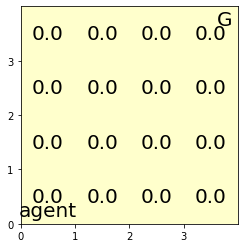

In [25]:
import matplotlib.pyplot as plt  
import matplotlib.patches as patches

def draw(mark_pos):
    fig, ax = plt.subplots()
    values = [[states[i][j].Q[states[i][j].best_action] for i in range(size)] for j in range(size)]
    mp = ax.pcolor(values, cmap=plt.cm.YlOrRd,vmin=0,vmax=8)
    ax.set_aspect(1)
    ax.set_xticks(range(size), minor=False)
    ax.set_yticks(range(size), minor=False)
    
    for x in range(len(values)):
        for y in range(len(values[0])):
            s = states[x][y]
            plt.text(x+0.5,y+0.5,int(1000*s.Q[s.best_action])/1000,ha = 'center', va = 'center', size=20)
            if states[x][y].goal:
                plt.text(x+0.75,y+0.75,"G",ha = 'center', va = 'center', size=20)
                
    plt.text(agent.pos[0]+0.5,agent.pos[1]+0.25,"agent",ha = 'center', va = 'center', size=20)
    
    if mark_pos == "all":   # 指定した位置にactionの文字列を書くという処理
        for x in range(size):
            for y in range(size):
                if states[x][y].goal: continue
                plt.text(x+0.5,y+0.25,states[x][y].best_action,ha = 'center', va = 'center', size=20)
    elif mark_pos != None: 
        s = states[mark_pos[0]][mark_pos[1]]
        plt.text(mark_pos[0]+0.5,mark_pos[1]+0.25,s.best_action,ha = 'center', va = 'center', size=20)
            
    plt.show()
    fig.clear()
    
draw(None)

In [26]:
import random

def state_transition(s_pos,a):
    ###確率10%で元のまま ###
    if random.uniform(0,1) < 0.1:
        return s_pos
    
    x,y = s_pos
    if   a == "↑": y += 1
    elif a == "↓": y -= 1
    elif a == "→": x += 1
    elif a == "←": x -= 1
    elif a == "➚":
        x+=1
        y+=1
    elif a == "↖":
        x-=1
        y+=1
    elif a == "➘":
        x+=1
        y-=1
    elif a == "↙":
        x-=1
        y-=1
        
    #if x < 0:       x = 0
    #elif x >= size: x = size-1
    #if y < 0:       y = 0
    #elif y >= size: y = size-1
    if x < 0 or x>= size:
        return s_pos
    if y < 0 or y>= size:
        return s_pos
        
    return (x,y)

In [27]:
def e_greedy(s):
    if random.uniform(0,1) < 0.1: #10%でランダムに
        return random.choice(agent.actions)
    else:
        best_a = None
        best_q = 1000000000
        for a in s.Q:
            if best_q > s.Q[a]:
                best_q = s.Q[a]
                best_a = a
        s.best_action = best_a
        return best_a

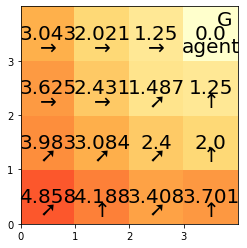

In [30]:
alpha = 0.5
gamma = 1.0

def q_proc(s_pos,a):
    s = states[s_pos[0]][s_pos[1]]
    s_next_pos = state_transition(s_pos,a)
    s_next = states[s_next_pos[0]][s_next_pos[1]]
    a_next = e_greedy(s_next)
    
    if a == "➚" or a == "↖" or a == "➘" or a == "↙":
        #q = (1.0-alpha)*s.Q[a] + alpha * (1.4 + gamma * s_next.Q[a_next])
        q = (1.0-alpha)*s.Q[a] + alpha * (1.4 + gamma * s_next.Q[s_next.best_action])
    else:
        #q = (1.0-alpha)*s.Q[a] + alpha * (1.0 + gamma * s_next.Q[a_next])
        q = (1.0-alpha)*s.Q[a] + alpha * (1.0 + gamma * s_next.Q[s_next.best_action])
        
    #print("s:" + str(s_pos)+ "　a:" + a + " s':" + str(s_next_pos) + " a':" + a_next)
    #print("----")
    return s_next_pos, a_next, q

def one_trial():
    agent.pos = (random.randrange(size),random.randrange(size))
    a = e_greedy(states[agent.pos[0]][agent.pos[1]])
    if states[agent.pos[0]][agent.pos[1]].goal:
        return
          
    while True:
        #draw(None)
        s_next, a_next, q = q_proc(agent.pos,a)
        states[agent.pos[0]][agent.pos[1]].Q[a] = q
        agent.pos = s_next
        a = a_next
        if states[agent.pos[0]][agent.pos[1]].goal:
            break
            
for i in range(100):
    one_trial()
draw("all")